[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/upm-classes/image_mining_2021_2022/blob/main/04_convolution_features.ipynb)

## Convolution Features

Use of convolution and kernels to preprocess an image and highlight image features or using the results as new image features.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Read image

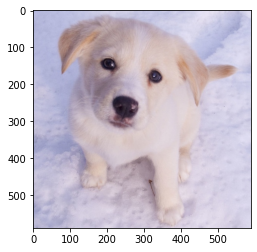

In [2]:
image = cv2.imread('./puppy.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # obtain an RGB version

plt.imshow(image)
plt.show()

In [3]:
def convolve(img: np.array, kernel: np.array) -> np.array:
  # Funtion for convolving an image with a kernel, it is not optimized

  # Dimensions of the image are reduced when convolution is applied
  # to avoid this, padding is used before convolution
  h = img.shape[0] - kernel.shape[0] + 1 
  w = img.shape[1] - kernel.shape[1] + 1

  k_h, k_w  = kernel.shape[0], kernel.shape[1]
    
  # 2D array of zeros
  convolved_img = np.zeros(shape=(h, w))
    
  # Iterate over the rows
  for i in range(h):
    # Iterate over the columns
    for j in range(w):
      # img[i, j] = individual pixel value
      # Get the current matrix
      mat = img[i:i+k_h, j:j+k_w]

      # Apply the convolution - element-wise multiplication and summation of the result
      # Store the result to i-th row and j-th column of our convolved_img array
      convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
  return convolved_img

#### Some image preprocessing

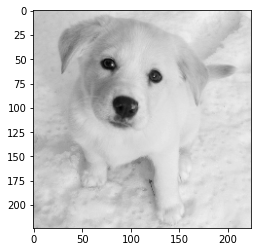

In [4]:
# We convert image into grayscale and normalize to [0,1] range
im = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) / 255.0

im = cv2.resize(im, (224, 224)) # resize image to 224x224, it works also with RGB

plt.imshow(im, cmap='gray')
plt.show()

#### Blurring image

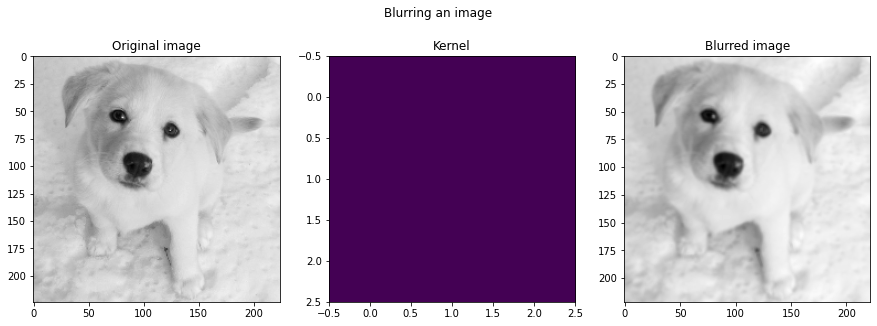

In [5]:
kernel = np.ones((3, 3)) / 9

blurred_img = convolve(im / 255, kernel)
# Normalize image
blurred_img = (blurred_img * 255 / blurred_img.max()).astype(np.uint8)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Blurring an image')
ax1.imshow(im, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(kernel)
ax2.set_title('Kernel')
ax3.imshow(blurred_img, cmap='gray')
ax3.set_title('Blurred image')
plt.show()

#### Edge detection (Sobel)

##### Horizontal

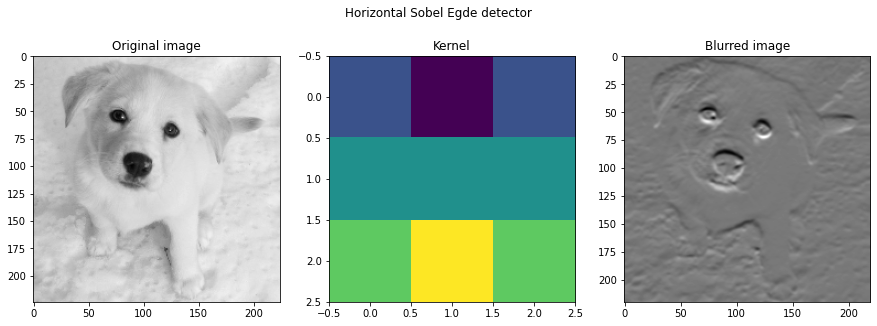

In [6]:
kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]).astype(np.float32)

edge_img_h = convolve(blurred_img / 255, kernel)

# Plot images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Horizontal Sobel Egde detector')
ax1.imshow(im, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(kernel)
ax2.set_title('Kernel')
ax3.imshow(edge_img_h, cmap='gray')
ax3.set_title('Blurred image')
plt.show()

##### Vertical

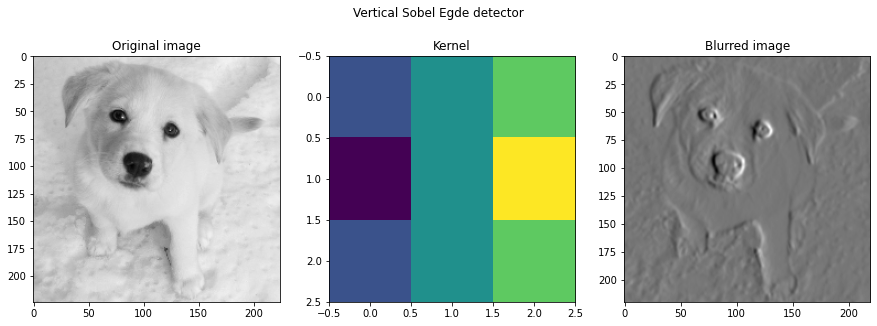

In [7]:
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).astype(np.float32)

edge_img_v = convolve(blurred_img / 255, kernel)

# Plot images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Vertical Sobel Egde detector')
ax1.imshow(im, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(kernel)
ax2.set_title('Kernel')
ax3.imshow(edge_img_v, cmap='gray')
ax3.set_title('Blurred image')
plt.show()

##### Combining vertical and horizontal edge detections

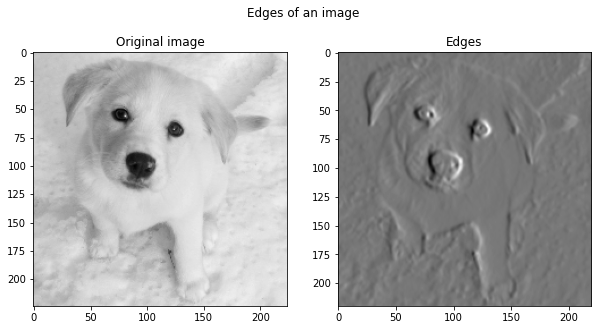

In [8]:
edge_img = np.sqrt(edge_img_h ** 2 + edge_img_v ** 2)

# Plot images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Edges of an image')
ax1.imshow(im, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(edge_img_v, cmap='gray')
ax2.set_title('Edges')
plt.show()

Other kernels can be find in: https://setosa.io/ev/image-kernels/

## Convolutional neural network features

CNNs follow the same principle of convolution with kernels showed above. However the kernels are self-learned. It learns the best kernels for extracting features.

In [9]:
import numpy as np
from tensorflow.keras.applications import VGG16
# For more model check: https://www.tensorflow.org/api_docs/python/tf/keras/applications
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

#### Open Image

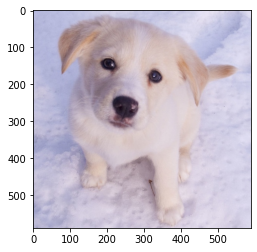

In [10]:
image = cv2.imread('./puppy.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # obtain an RGB version

plt.imshow(image)
plt.show()

#### Preprocessing image for feeding network

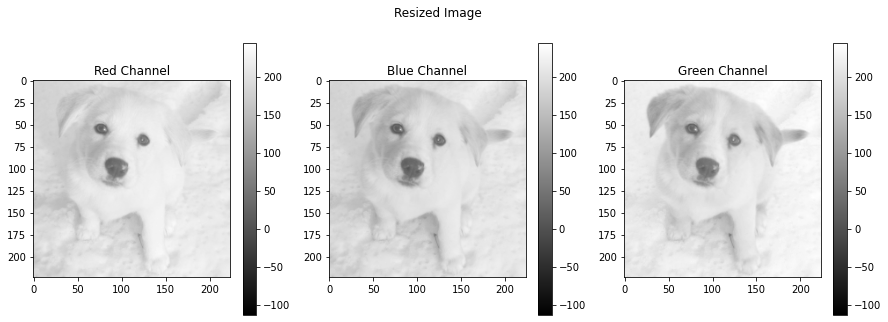

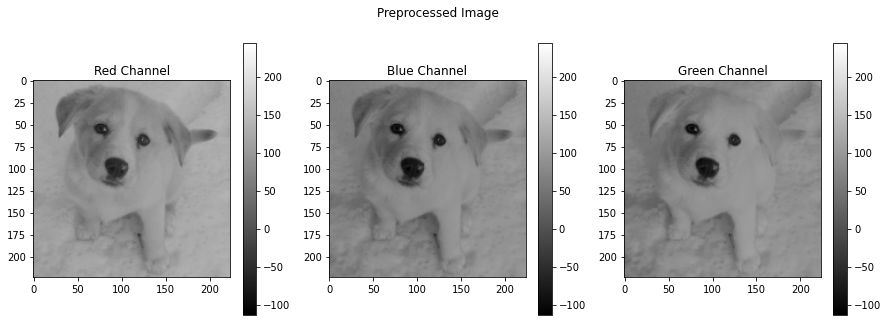

In [15]:
# resize image
img = resize(image, output_shape=(224, 224), preserve_range=True).astype(np.uint8)

x = np.expand_dims(img, axis=0) # batch x width x height x channels
x = preprocess_input(x) # Normalize image accoding to imageNET

v_min = np.min([np.min(img.astype(float)), np.min(x.astype(float))])
v_max = np.max([np.max(img.astype(float)), np.max(x.astype(float))])

# Plot images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Resized Image')
im1 = ax1.imshow(img[:,:,0], cmap='gray', vmin=v_min, vmax=v_max)
plt.colorbar(im1, ax=ax1) # TODO: set the same scale
ax1.set_title('Red Channel')
im2 = ax2.imshow(img[:,:,1], cmap='gray', vmin=v_min, vmax=v_max)
plt.colorbar(im2, ax=ax2)
ax2.set_title('Blue Channel')
im3 = ax3.imshow(img[:,:,2], cmap='gray', vmin=v_min, vmax=v_max)
plt.colorbar(im3, ax=ax3)
ax3.set_title('Green Channel')
plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Preprocessed Image')
im1 = ax1.imshow(np.squeeze(x)[:,:,0], cmap='gray', vmin=v_min, vmax=v_max)
plt.colorbar(im1, ax=ax1)
ax1.set_title('Red Channel')
im2 = ax2.imshow(np.squeeze(x)[:,:,1], cmap='gray', vmin=v_min, vmax=v_max)
plt.colorbar(im2, ax=ax2)
ax2.set_title('Blue Channel')
im3 = ax3.imshow(np.squeeze(x)[:,:,2], cmap='gray', vmin=v_min, vmax=v_max)
plt.colorbar(im3, ax=ax3)
ax3.set_title('Green Channel')
plt.show()

#### Loading pretrained weights (include self-learned kernels)

In [16]:
base_model = VGG16(weights='imagenet') # It will download the pretrained model

print('Neural network structure')
display(base_model.summary())

553476096/553467096 [==============================] - 5s 0us/step
Neural network structure
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                   

None

#### Visualizing features

Only 8 outputs from convolution layers are shown.

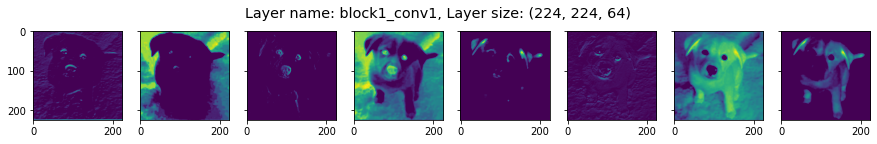

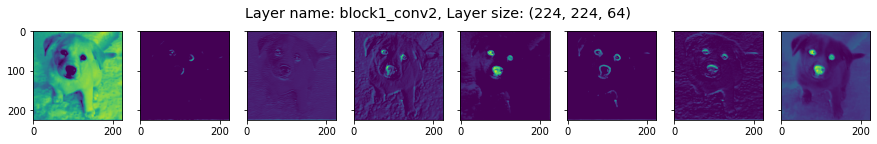

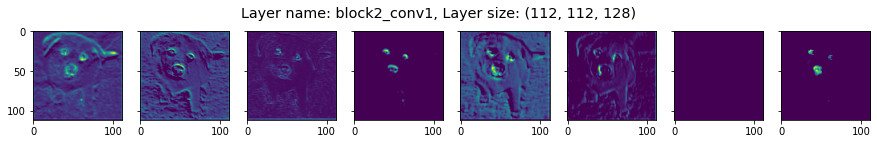

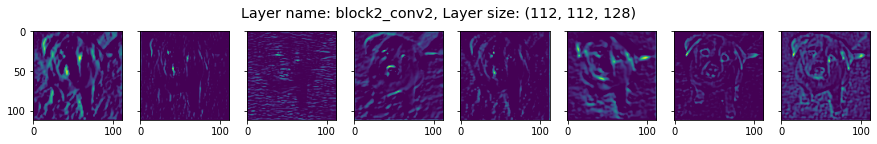

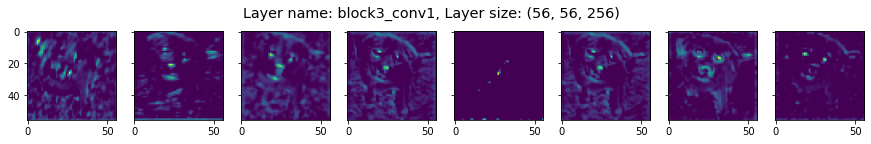

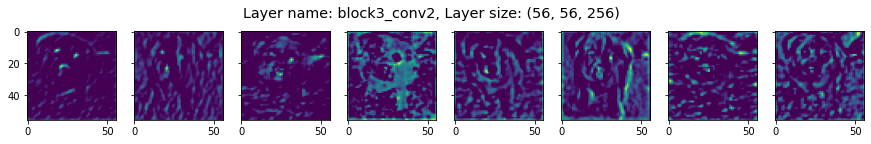

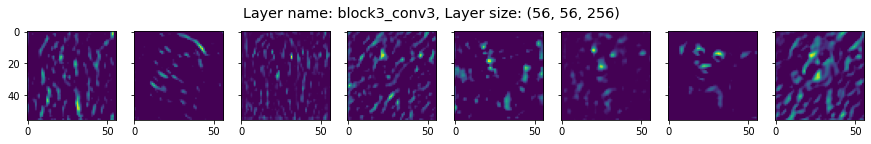

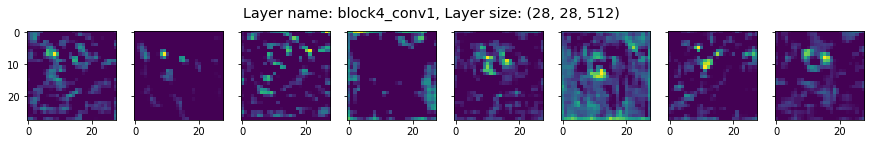

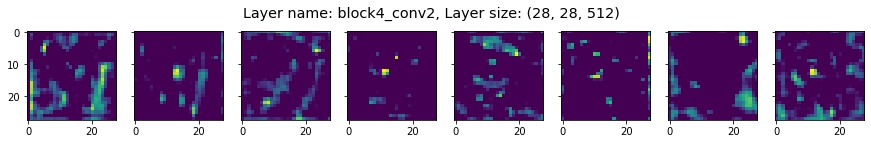

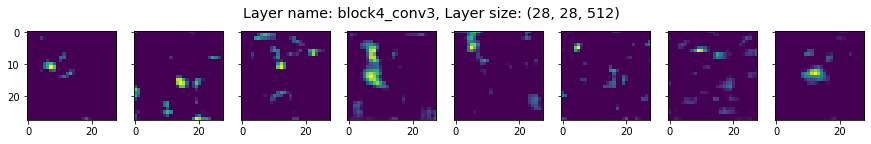

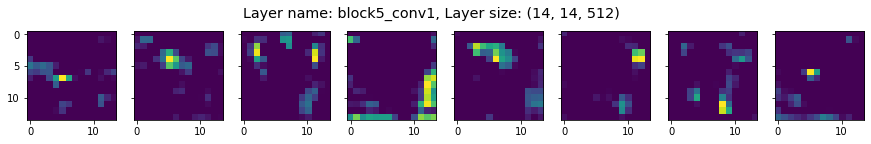

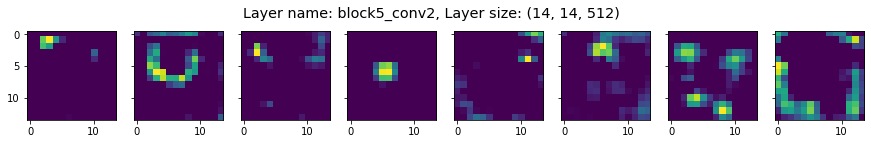

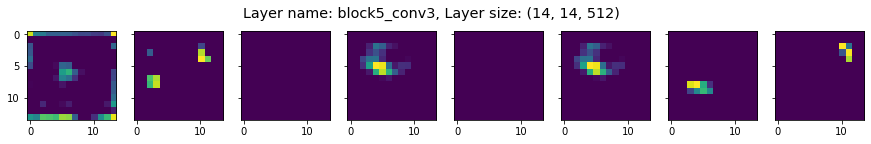

In [18]:
layers = [layer.name for layer in base_model.layers if '_conv' in layer.name]

for layer in layers:
    model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer).output)
    features = model.predict(x)
    features = np.squeeze(features)
    
    fig, ax = plt.subplots(1, 8, figsize=(15, 2), sharex='col', sharey='row')
    fig.suptitle('Layer name: {}, Layer size: {}'.format(layer, features.shape), fontsize='x-large')
    for i, feat_index in enumerate(np.random.randint(0, features.shape[2], 8)):
        ax[i].imshow(features[:,:,feat_index], cmap='viridis')
    plt.show()